In [30]:
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

In [31]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.cross_validation import train_test_split
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [32]:
data=pd.read_csv("../Going In-depth/Mortgage.csv")
x=data.drop('Resp',axis=1)
y=data.Resp
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.35)

In [33]:
clf=DecisionTreeClassifier(max_features=0.5,max_depth=8)
clf=clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print(accuracy_score(y_test,pred))

0.922304439746


In [34]:
from sklearn import tree
from IPython.display import Image
dotfile=StringIO()
tree.export_graphviz(clf,feature_names=X_train.columns,rounded=True,special_characters=True,out_file='tree.dot')
#problem in download pydot package

0    0.936047
dtype: float64


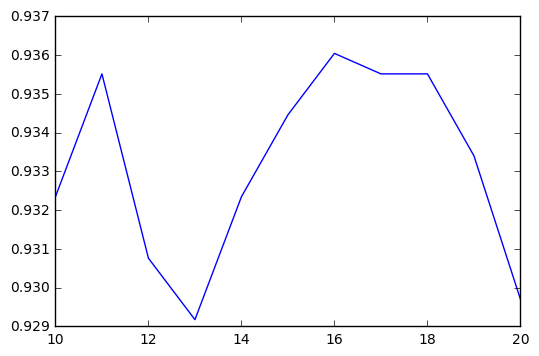

In [47]:
scores=[]
for i in range(10,21):
    clf=DecisionTreeClassifier(max_features=0.7,max_depth=6,criterion='gini',min_samples_split=i)
    clf=clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    scores.append(accuracy_score(pred,y_test))
plt.plot(range(10,21),scores)
print(pd.DataFrame(scores).max())